# Instructions
This is the ipython notebook for creating visual interpretation of the results of the final experiment, which are stored in csv format.

# import necessary modules

In [2]:
import pandas as pd
import numpy as np
import csv
import tools as t
import matplotlib.pyplot as plt

# Loading necessary data, functions
You can optionally first run write to csv to ensure all available data is in the files. Then load the csv with appropriate paths.

## Data

In [3]:
# t.write_results_to_csv()
csv_path_NN = r"C:\Users\thebo\Desktop\resultsQRL\NN_experiment_data.csv"
csv_path_PQC = r"C:\Users\thebo\Desktop\resultsQRL\PQC_experiment_data.csv"	
df_PQC = pd.read_csv(csv_path_PQC)
df_NN = pd.read_csv(csv_path_NN)
df_NN[["best_performance", "std_best_performance", "mean_performance", "std_mean_performance", "std_std_performance", "best_policy_math_avg"]] = df_NN[["best_performance", "std_best_performance", "mean_performance", "std_mean_performance", "std_std_performance", "best_policy_math_avg"]].round(4)
df_PQC[["best_performance", "std_best_performance", "mean_performance", "std_mean_performance", "std_std_performance", "best_policy_math_avg"]] = df_PQC[["best_performance", "std_best_performance", "mean_performance", "std_mean_performance", "std_std_performance", "best_policy_math_avg"]].round(4)
# print(df_PQC[df_PQC["n_holes"]==6])

print("There are {} NN models and {} PQC models".format(len(df_NN), len(df_PQC)))
print(df_NN.columns)

There are 2304 NN models and 1920 PQC models
Index(['environment', 'type', 'n_inputs', 'n_episodes', 'n_holes',
       'n_hidden_layers', 'n_nodes_per_layer', 'learning_rate', 'max_steps',
       'batch_size', 'number_of_parameters', 'n_reps', 'n_completed_runs',
       'best_performance', 'std_best_performance', 'mean_performance',
       'std_mean_performance', 'std_std_performance', 'best_policy',
       'best_policy_math_avg', 'n_achieved_best_policy'],
      dtype='object')


## Manually inputting optimal policies




In [6]:
columns = ["environment","n_holes","random","performance", "policy", "min_memory"]
data_optimal = [
    ['fiah', 5, 4.5705, 2.9309, "[1 1 3 3 1 1 3 3 1 1]", 2],
    ['fiah', 6, 5.1925, 3.3919, "[1 4 4 1 2 2 4 4 1 1]", 4],
    ['fiah', 7, 5.7157, 4.0017, "[1 5 2 1 5 4 1 5 3 1]", 3],
    ['fiah', 8, 6.1585, 4.4937, "[6 6 3 1 1 3 6 6 3 1]", 2],
    ['givens-gx0.79-gy1.57', 5, 4.5705, 2.8325, "[3 0 4 0 3 0 4 2 3 0]", 4],
    ['givens-gx0.79-gy1.57', 6, 5.1925, 3.3444, "[0 3 5 4 4 4 0 5 3 3]", 3],
    ['givens-gx0.79-gy1.57', 7, 5.7157, 3.4164, "[5 0 6 6 2 2 2 6 4 1]", 3],
    ['givens-gx0.79-gy1.57', 8, 6.1585, 3.7856, "[1 5 0 6 6 2 7 4 2 2]", 2],
    ['givens-gx3.14-gy1.57', 5, 4.5705, 3.0000, "[3 3 1 1 0 0 0 0 0 0]", 2],
    ['givens-gx3.14-gy1.57', 6, 5.1925, 3.5000, "[5 3 3 1 1 0 0 0 0 0]", 2],
    ['givens-gx3.14-gy1.57', 7, 5.7157, 4.0000, "[5 5 3 3 1 1 0 0 0 0]", 2],
    ['givens-gx3.14-gy1.57', 8, 6.1585, 4.5000, "[7 5 5 3 3 1 1 0 0 0]", 2],
    ['givens-gy0.79-gx0.79', 5, 4.5705, 2.6472, "[2 1 3 3 0 3 4 0 2 2]", 2],
    ['givens-gy0.79-gx0.79', 6, 5.1925, 2.8326, "[1 5 2 5 0 5 0 5 3 1]", 4],
    ['givens-gy0.79-gx0.79', 7, 5.7157, 3.4658, "[3 5 2 5 2 5 2 1 3 5]", 5],
    ['givens-gy0.79-gx0.79', 8, 6.1585, 3.5036, "[4 7 4 1 7 2 7 1 7 3]", 3]

]

df_optimal = pd.DataFrame(data = data_optimal, columns = columns )
style = df_optimal.style


hole_5= df_optimal[df_optimal["n_holes"]==5]
hole_6= df_optimal[df_optimal["n_holes"]==6]
hole_7= df_optimal[df_optimal["n_holes"]==7]
hole_8= df_optimal[df_optimal["n_holes"]==8]

data = [hole_5, hole_6, hole_7, hole_8]

for d in data:
    d= d.drop('n_holes', axis=1)
    style = d.style
    style.hide()
    print(style.to_latex())

print(t.random_policy_result_classical('fiah', 5, 10))




\begin{tabular}{lrrlr}
environment & random & performance & policy & min_memory \\
fiah & 4.570500 & 2.930900 & [1 1 3 3 1 1 3 3 1 1] & 2 \\
givens-gx0.79-gy1.57 & 4.570500 & 2.832500 & [3 0 4 0 3 0 4 2 3 0] & 4 \\
givens-gx3.14-gy1.57 & 4.570500 & 3.000000 & [3 3 1 1 0 0 0 0 0 0] & 2 \\
givens-gy0.79-gx0.79 & 4.570500 & 2.647200 & [2 1 3 3 0 3 4 0 2 2] & 2 \\
\end{tabular}

\begin{tabular}{lrrlr}
environment & random & performance & policy & min_memory \\
fiah & 5.192500 & 3.391900 & [1 4 4 1 2 2 4 4 1 1] & 4 \\
givens-gx0.79-gy1.57 & 5.192500 & 3.344400 & [0 3 5 4 4 4 0 5 3 3] & 3 \\
givens-gx3.14-gy1.57 & 5.192500 & 3.500000 & [5 3 3 1 1 0 0 0 0 0] & 2 \\
givens-gy0.79-gx0.79 & 5.192500 & 2.832600 & [1 5 2 5 0 5 0 5 3 1] & 4 \\
\end{tabular}

\begin{tabular}{lrrlr}
environment & random & performance & policy & min_memory \\
fiah & 5.715700 & 4.001700 & [1 5 2 1 5 4 1 5 3 1] & 3 \\
givens-gx0.79-gy1.57 & 5.715700 & 3.416400 & [5 0 6 6 2 2 2 6 4 1] & 3 \\
givens-gx3.14-gy1.57 & 5.7157

# Create normalized dataframes



In [45]:
df_PQC_normed = df_PQC.copy(deep = True)
df_NN_normed = df_NN.copy(deep = True)
envs = np.unique(df_PQC["environment"])
for n in [5,6,7,8]:
    random = df_optimal[df_optimal["n_holes"]==n]["random"].values[0]
    for env in envs:

        optimal = df_optimal[(df_optimal["n_holes"]==n) & (df_optimal["environment"]==env)]["performance"].values[0]
        df_PQC_normed.loc[(df_PQC_normed["n_holes"]==n) & (df_PQC_normed["environment"]==env),["best_performance", "std_best_performance", "mean_performance", "std_mean_performance", "std_std_performance", "best_policy_math_avg"]] = (df_PQC_normed[(df_PQC_normed["n_holes"]==n) & (df_PQC_normed["environment"]==env)][["best_performance", "std_best_performance", "mean_performance", "std_mean_performance", "std_std_performance", "best_policy_math_avg"]].values- optimal)/(random-optimal)
        df_NN_normed.loc[(df_NN_normed["n_holes"]==n) &(df_NN_normed["environment"]==env),["best_performance", "std_best_performance", "mean_performance", "std_mean_performance", "std_std_performance", "best_policy_math_avg"]] = (df_NN_normed[(df_NN_normed["n_holes"]==n) & (df_NN_normed["environment"]==env)][["best_performance", "std_best_performance", "mean_performance", "std_mean_performance", "std_std_performance", "best_policy_math_avg"]].values- optimal)/(random-optimal)



In [38]:
guesses = [3, 1, 3, 4, 4, 1, 4, 4, 4, 1]
from bruteforce_policy import run_guesses_fiah
from tools import retrieve_transfer_matrices
transfer_matrices = retrieve_transfer_matrices('fiah', 5)
print(run_guesses_fiah(np.ones(5)/5, transfer_matrices, guesses, 10))

4.390625000000001


## Load used functions

In [13]:
def select_data(df_NN, df_PQC, env_name = None, n_holes= None, lr = None, n_eps = None):
    data_NN = df_NN
    data_PQC = df_PQC

    if env_name is not None:
        data_NN = data_NN[data_NN["environment"]== env_name]
        data_PQC = data_PQC[data_PQC["environment"]== env_name]
    
    if n_holes is not None:
        data_NN = data_NN[data_NN["n_holes"]== n_holes]
        data_PQC = data_PQC[data_PQC["n_holes"]== n_holes]

    if lr is not None:
        data_NN = data_NN[data_NN["learning_rate"]==lr]
        data_PQC = data_PQC[data_PQC["learning_rate"]==lr]

    if n_eps is not None:
        data_NN = data_NN[data_NN["n_episodes"]==n_eps]
        data_PQC = data_PQC[data_PQC["n_episodes"]==n_eps]
    
    return data_NN, data_PQC



## Check dataframe for uneven entries

### NN

In [14]:
df_NN[df_NN["environment"] == "fiah"].head()
print(len(df_NN))
for lr in [0.1, 0.01, 0.001]:
    for n_eps in [2500, 11600, 53860, 250000]:
        mask = df_NN[df_NN["learning_rate"]==lr][df_NN["n_episodes"]==n_eps]
        print(f"for lr {lr} and {n_eps} eps, there are {len(mask)} models")
# print((df_NN))
# print(len(df_NN[df_NN["environment"]=='fiah']))
# print(len(df_NN[df_NN["environment"]=='givens-gx3.14-gy1.57']))
# print(len(df_NN[df_NN["environment"]=='givens-gx0.79-gy1.57']))
# missing = df_NN[df_NN["learning_rate"]==0.1][df_NN["n_episodes"]==2500][df_NN["environment"]=='givens-gx3.14-gy1.57'][df_NN["n_holes"]==6]

# print(missing)

# missing: 1 hidden layer 3 nodes

2304
for lr 0.1 and 2500 eps, there are 192 models
for lr 0.1 and 11600 eps, there are 192 models
for lr 0.1 and 53860 eps, there are 192 models
for lr 0.1 and 250000 eps, there are 192 models
for lr 0.01 and 2500 eps, there are 192 models
for lr 0.01 and 11600 eps, there are 192 models
for lr 0.01 and 53860 eps, there are 192 models
for lr 0.01 and 250000 eps, there are 192 models
for lr 0.001 and 2500 eps, there are 192 models
for lr 0.001 and 11600 eps, there are 192 models
for lr 0.001 and 53860 eps, there are 192 models
for lr 0.001 and 250000 eps, there are 192 models


C:\Users\thebo\AppData\Local\Temp\ipykernel_19064\4228296093.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mask = df_NN[df_NN["learning_rate"]==lr][df_NN["n_episodes"]==n_eps]
C:\Users\thebo\AppData\Local\Temp\ipykernel_19064\4228296093.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mask = df_NN[df_NN["learning_rate"]==lr][df_NN["n_episodes"]==n_eps]
C:\Users\thebo\AppData\Local\Temp\ipykernel_19064\4228296093.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mask = df_NN[df_NN["learning_rate"]==lr][df_NN["n_episodes"]==n_eps]
C:\Users\thebo\AppData\Local\Temp\ipykernel_19064\4228296093.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mask = df_NN[df_NN["learning_rate"]==lr][df_NN["n_episodes"]==n_eps]
C:\Users\thebo\AppData\Local\Temp\ipykernel_19064\4228296093.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 

### PQC

In [15]:
df_PQC.head()
print(len(df_PQC["max_steps"]))
for lr in [0.1, 0.01, 0.001]:
    for n_eps in [2500, 11600, 53860, 250000]:
        mask = df_PQC[df_PQC["learning_rate"]==lr][df_PQC["n_episodes"]==n_eps]
        print(f"for lr {lr} and {n_eps} eps, there are {len(mask)} models")

# missing = df_PQC[df_PQC["learning_rate"]==0.001][df_PQC["n_episodes"]==2500][df_PQC["environment"]=='fiah'][df_PQC["n_holes"]==6]

# print(missing)

# missing: 9 layers

1920
for lr 0.1 and 2500 eps, there are 160 models
for lr 0.1 and 11600 eps, there are 160 models
for lr 0.1 and 53860 eps, there are 160 models
for lr 0.1 and 250000 eps, there are 160 models
for lr 0.01 and 2500 eps, there are 160 models
for lr 0.01 and 11600 eps, there are 160 models
for lr 0.01 and 53860 eps, there are 160 models
for lr 0.01 and 250000 eps, there are 160 models
for lr 0.001 and 2500 eps, there are 160 models
for lr 0.001 and 11600 eps, there are 160 models
for lr 0.001 and 53860 eps, there are 160 models
for lr 0.001 and 250000 eps, there are 160 models


C:\Users\thebo\AppData\Local\Temp\ipykernel_19064\483398333.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mask = df_PQC[df_PQC["learning_rate"]==lr][df_PQC["n_episodes"]==n_eps]
C:\Users\thebo\AppData\Local\Temp\ipykernel_19064\483398333.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mask = df_PQC[df_PQC["learning_rate"]==lr][df_PQC["n_episodes"]==n_eps]
C:\Users\thebo\AppData\Local\Temp\ipykernel_19064\483398333.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mask = df_PQC[df_PQC["learning_rate"]==lr][df_PQC["n_episodes"]==n_eps]
C:\Users\thebo\AppData\Local\Temp\ipykernel_19064\483398333.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mask = df_PQC[df_PQC["learning_rate"]==lr][df_PQC["n_episodes"]==n_eps]
C:\Users\thebo\AppData\Local\Temp\ipykernel_19064\483398333.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame i

### selection of accidental double runs

In [10]:
# mask = df_PQC[df_PQC["learning_rate"]==0.01][df_PQC["n_episodes"]==11600][df_PQC["environment"]=="fiah"][df_PQC["n_layers"]==5]
# print(mask)
# # a = np.random.choice([77,163])
# # print(a)
# # df_PQC.drop(index = a, inplace= True)


# Data Analysis

## Performance as function of amount of parameters

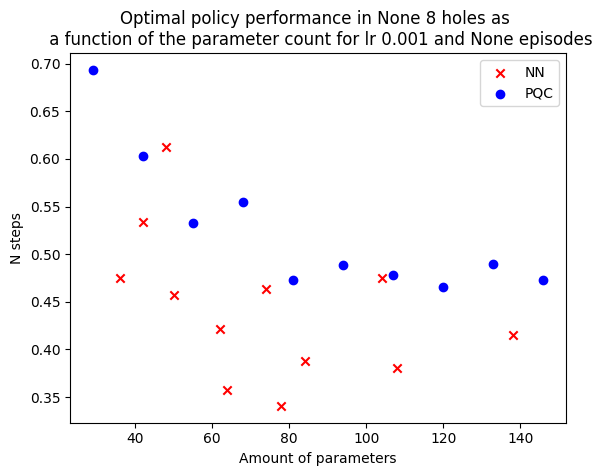

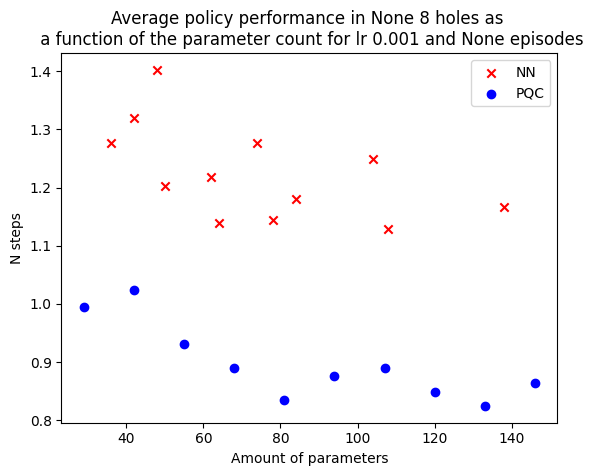

In [49]:
def plot_best_performance_and_mean_per_params(df_NN, df_PQC, env_name, n_holes, lr = None, n_eps = None, optimal_performance = None, normalize = True):

    data_NN, data_PQC = select_data(df_NN, df_PQC, env_name, n_holes, lr, n_eps)

    avg_best_performances_NN = []
    avg_mean_performances_NN = []

    avg_best_performances_PQC = []
    avg_mean_performances_PQC = []

    different_parameter_counts_NN = np.unique(data_NN["number_of_parameters"])
    different_parameter_counts_PQC = np.unique(data_PQC["number_of_parameters"])


    for n_params in different_parameter_counts_NN:
        data = data_NN[data_NN["number_of_parameters"]==n_params]
        # print(data["best_policy_math_avg"])
        avg_best_performance = np.mean(data["best_policy_math_avg"])
        avg_best_performances_NN.append(avg_best_performance)

        avg_mean_performance = np.mean(data["mean_performance"])
        avg_mean_performances_NN.append(avg_mean_performance)

    for n_params in different_parameter_counts_PQC:
        data = data_PQC[data_PQC["number_of_parameters"]==n_params]
        avg_best_performance = np.mean(data["best_policy_math_avg"])
        avg_best_performances_PQC.append(avg_best_performance)

        avg_mean_performance = np.mean(data["mean_performance"])
        avg_mean_performances_PQC.append(avg_mean_performance)

    plt.scatter(different_parameter_counts_NN, avg_best_performances_NN, marker= "x", color = "r", label = "NN")
    plt.scatter(different_parameter_counts_PQC, avg_best_performances_PQC, marker= "o", color = "b", label = "PQC")

    if optimal_performance is not None:
        plt.axhline(y = optimal_performance, linestyle = "dashed", color = 'g', label = "optimal")

    plt.xlabel("Amount of parameters")
    plt.ylabel("N steps")
    plt.title(f"Optimal policy performance in {env_name} {n_holes} holes as \n a function of the parameter count for lr {lr} and {n_eps} episodes")
    plt.legend()
    plt.show()

    plt.scatter(different_parameter_counts_NN, avg_mean_performances_NN, marker= "x", color = "r", label = "NN")
    plt.scatter(different_parameter_counts_PQC, avg_mean_performances_PQC, marker= "o", color = "b", label = "PQC")

    if optimal_performance is not None:
        plt.axhline(y = optimal_performance, linestyle = "dashed", color = 'g', label = "optimal")

    plt.xlabel("Amount of parameters")
    plt.ylabel("N steps")
    plt.title(f"Average policy performance in {env_name} {n_holes} holes as \n a function of the parameter count for lr {lr} and {n_eps} episodes")
    plt.legend()
    plt.show()

    pass

# eerste resultaten:

# set 1
env_name = None
lr = 0.001
n_eps = None
n_holes = 8


plot_best_performance_and_mean_per_params(df_NN_normed, df_PQC_normed, env_name, n_holes, lr, n_eps, optimal_performance= None)

## Performance distribution

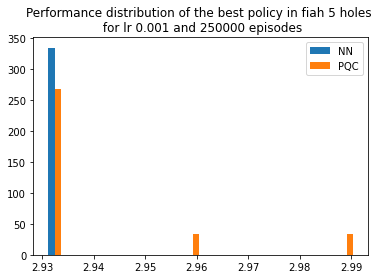

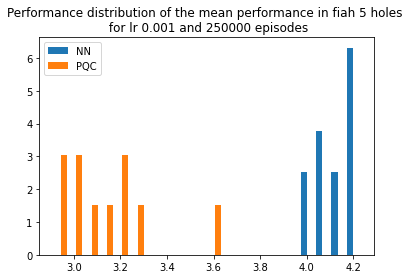

In [78]:
def performance_distribution(df_NN, df_PQC, env_name= None, n_holes= None, lr = None, n_eps = None, bins = 100, optimal_performance = None):

    data_NN, data_PQC = select_data(df_NN, df_PQC, env_name, n_holes, lr, n_eps)

    best_policy_math_avg_NN = data_NN["best_policy_math_avg"]
    best_policy_math_avg_PQC = data_PQC["best_policy_math_avg"]
    plt.hist([best_policy_math_avg_NN, best_policy_math_avg_PQC], bins = bins, density= True, label= ["NN", "PQC"])
    plt.title(f"Performance distribution of the best policy in {env_name} {n_holes} holes \n for lr {lr} and {n_eps} episodes")
    # if optimal_performance is not None:
    #     plt.xticks(list(range(10))+ [optimal_performance])

    plt.legend()
    plt.show()

    mean_performances_NN = data_NN["mean_performance"]
    mean_performances_PQC = data_PQC["mean_performance"]

    # if optimal_performance is not None:
    #     plt.xticks([optimal_performance], ["optimal"])

    plt.hist([mean_performances_NN, mean_performances_PQC], bins = bins, density= True, label= ["NN", "PQC"])
    plt.title(f"Performance distribution of the mean performance in {env_name} {n_holes} holes \n for lr {lr} and {n_eps} episodes")
    plt.legend()
    plt.show()
    # avg_hist_NN = data_NN.hist(column = "mean_performance", bins= bins)
    # avg_hist_PQC = data_PQC.hist(column = "mean_performance", bins= bins)

    pass

env_name = 'fiah'
n_holes = 5
lr = 0.001
n_eps = 250000

performance_distribution(df_NN, df_PQC, env_name, n_holes, lr, n_eps, bins = 20)

## Convergence ratio

In [82]:
def convergence_ratios(df_NN, df_PQC, env_name, n_holes, lr = None, n_eps = None, optimal_performance= None):
    data_NN, data_PQC = select_data(df_NN, df_PQC, env_name, n_holes, lr, n_eps)
    n_entries_NN = len(data_NN)
    n_entries_PQC = len(data_PQC)

    converged_NNs = data_NN[data_NN["best_policy_math_avg"]==optimal_performance]
    converged_PQCs = data_PQC[data_PQC["best_policy_math_avg"]==optimal_performance]

    ratio_at_leat_1_converged_NN = len(converged_NNs)/n_entries_NN
    ratio_at_leat_1_converged_PQC = len(converged_PQCs)/n_entries_PQC

    # "n_achieved_best_policy" is out of 10, so for full ratio need to take this into account
    total_models_converged_NN = np.sum(converged_NNs["n_achieved_best_policy"])
    total_models_converged_PQC = np.sum(converged_PQCs["n_achieved_best_policy"])

    convergence_ratio_NNs = total_models_converged_NN/(n_entries_NN*10)
    convergence_ratio_PQCs = total_models_converged_PQC/(n_entries_PQC*10)

    print("The ratio of models where at least 1 of the runs achieved the optimal policy was:\n NNs: {}, PQCs: {}.".format(
        ratio_at_leat_1_converged_NN, ratio_at_leat_1_converged_PQC
    ))
    print("The total convergence ratios are:\n NNs: {}, PQCs: {}.".format(
        convergence_ratio_NNs, convergence_ratio_PQCs
    ))

    pass

env_name = 'fiah'
n_holes = 5
lr = 0.1
n_eps = 250000
optimal_performance = df_optimal[df_optimal["environment"]==env_name][df_optimal["n_holes"]==n_holes]["performance"].values[0]

convergence_ratios(df_NN, df_PQC, env_name, n_holes, lr, n_eps, df_optimal[df_optimal["environment"]==env_name][df_optimal["n_holes"]==n_holes]["performance"].values[0])


The ratio of models where at least 1 of the runs achieved the optimal policy was:
 NNs: 0.0, PQCs: 1.0.
The total convergence ratios are:
 NNs: 0.0, PQCs: 0.49.


/home/s2025396/vscode/lib64/python3.6/site-packages/ipykernel_launcher.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/s2025396/vscode/lib64/python3.6/site-packages/ipykernel_launcher.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


## Training instability
Analysing the ratio of runs that return nans


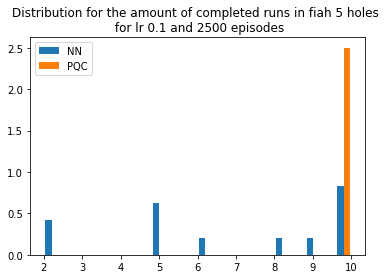

The ratio of completed runs for fiah 5 holes with lr 0.1 neps 2500 was: 
 NN: 0.6833333333333333, PQC: 1.0.


In [88]:
def completed_runs(df_NN, df_PQC, env_name=None, n_holes=None, lr = None, n_eps = None, bins = 100, plot_hist= True):
    data_NN, data_PQC = select_data(df_NN, df_PQC, env_name, n_holes, lr, n_eps)

    n_completed_runs_NN = data_NN["n_completed_runs"].fillna(0)
    n_completed_runs_PQC  = data_PQC["n_completed_runs"].fillna(0)

    if plot_hist:
        plt.hist([n_completed_runs_NN, n_completed_runs_PQC], bins = bins, density= True, label= ["NN", "PQC"])
        plt.title(f"Distribution for the amount of completed runs in {env_name} {n_holes} holes \n for lr {lr} and {n_eps} episodes")
        plt.legend()
        plt.show()
    
    
    print("The ratio of completed runs for {} {} holes with lr {} neps {} was: \n NN: {}, PQC: {}.".format(
        env_name, n_holes, lr, n_eps, (np.sum(n_completed_runs_NN)/(len(n_completed_runs_NN)*10)), 
        (np.sum(n_completed_runs_PQC)/(len(n_completed_runs_PQC)*10))
    ))

env_name = 'fiah'
n_holes = 5
lr = 0.1
n_eps = 250000
completed_runs(df_NN, df_PQC, "fiah", 5, 0.1, 2500, 20)

## Create table from results


In [36]:
def write_bests_to_table(df_NN, df_PQC, df_optimal, env_name=None, n_holes=None, print_latex = False):
    data_NN, data_PQC = select_data(df_NN, df_PQC, env_name, n_holes)

    #all_data = pd.concat([data_NN, data_PQC], ignore_index= True, sort= False)

    env_names = np.unique(data_NN["environment"])
    hole_nrs = np.unique(data_NN["n_holes"])


    table_data = []

    for env in env_names:
        for hole_nr in hole_nrs:
            row = [env, hole_nr]

            ## PQC
            relevant_data = data_PQC[data_PQC["environment"]==env][data_PQC["n_holes"]==hole_nr]
            best_performance = np.nanmin(relevant_data['best_policy_math_avg'])
            relevant_data = relevant_data[relevant_data["best_policy_math_avg"]==best_performance]
            min_params = np.min(relevant_data['number_of_parameters'])
            relevant_data = relevant_data[relevant_data['number_of_parameters']==min_params]
            min_eps = np.min(relevant_data['n_episodes'])
            relevant_data = relevant_data[relevant_data['n_episodes']==min_eps]
            # print(relevant_data)
            min_lr_arg = np.argmin(relevant_data['learning_rate'])
            # print(min_lr_arg)
            relevant_data = relevant_data.iloc[min_lr_arg]
            min_lr = relevant_data['learning_rate']
            policy = relevant_data['best_policy']
            row_PQC = [min_params, min_eps, min_lr, best_performance, policy]
            row.extend(row_PQC)

            #NN
            relevant_data = data_NN[data_NN["environment"]==env][data_NN["n_holes"]==hole_nr]
            best_performance = np.nanmin(relevant_data['best_policy_math_avg'])
            relevant_data = relevant_data[relevant_data["best_policy_math_avg"]==best_performance]
            min_params = np.min(relevant_data['number_of_parameters'])
            relevant_data = relevant_data[relevant_data['number_of_parameters']==min_params]
            min_eps = np.min(relevant_data['n_episodes'])
            relevant_data = relevant_data[relevant_data['n_episodes']==min_eps]
            # print(relevant_data)
            min_lr_arg = np.argmin(relevant_data['learning_rate'])
            # print(min_lr_arg)
            relevant_data = relevant_data.iloc[min_lr_arg]
            min_lr = relevant_data['learning_rate']
            policy = relevant_data['best_policy']
            row_NN = [min_params, min_eps, min_lr, best_performance, policy]
            row.extend(row_NN)
            optimal = df_optimal[df_optimal["environment"]==env][df_optimal["n_holes"]==hole_nr]
            row.extend([optimal["performance"].to_numpy()[0], optimal["policy"].to_numpy()[0]])

            table_data.append(row)

    
    results= pd.DataFrame(data = table_data, columns = ['environment', 'n holes', 'n parameters PQC', 'n episodes PQC', 'learning rate PQC', 'performance PQC', 'policy PQC', 'n parameters NN', 'n episodes NN', 'learning rate NN', 'performance NN', 'policy NN', "optimal performance", "optimal policy"] )
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(results)

    if print_latex:
        style = results.style
        style.hide()
        print(style.to_latex())
    
    pass

def write_specific_to_table(df_NN, df_PQC, env_name=None, n_holes=None, lr = None, n_episodes = None, print_latex = False):
    data_NN, data_PQC = select_data(df_NN, df_PQC, env_name, n_holes)

    all_data = pd.concat([data_NN, data_PQC], ignore_index= True, sort= False)

    env_names = np.unique(data_NN["environment"])
    hole_nrs = np.unique(data_NN["n_holes"])


    table_data = []

    for env in env_names:
        for hole_nr in hole_nrs:

            relevant_data = all_data[all_data["environment"]==env][all_data["n_holes"]==hole_nr]
            best_performance = np.nanmin(relevant_data['best_policy_math_avg'])
            relevant_data = relevant_data[relevant_data["best_policy_math_avg"]==best_performance]
            min_params = np.min(relevant_data['number_of_parameters'])
            relevant_data = relevant_data[relevant_data['number_of_parameters']==min_params]
            min_eps = np.min(relevant_data['n_episodes'])
            relevant_data = relevant_data[relevant_data['n_episodes']==min_eps]
            # print(relevant_data)
            min_lr_arg = np.argmin(relevant_data['learning_rate'])
            # print(min_lr_arg)
            relevant_data = relevant_data.iloc[min_lr_arg]
            min_lr = relevant_data['learning_rate']
            type = relevant_data['type']
            policy = np.array(relevant_data['best_policy'])
            row = [env, hole_nr, type, min_params, min_eps, min_lr, best_performance, policy]
            table_data.append(row)

    
    results= pd.DataFrame(data = table_data, columns = ['environment', 'n holes', 'type', 'n parameters', 'n episodes', 'learning rate', 'performance', 'policy'])
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(results)
    
    if print_latex:
        results.style.to_latex()

    pass

write_bests_to_table(df_NN, df_PQC, df_optimal, print_latex= True)

             environment  n holes  n parameters PQC  n episodes PQC  \
0                   fiah        5                20            2500   
1                   fiah        6                67          250000   
2                   fiah        7                38           53860   
3                   fiah        8               107          250000   
4   givens-gx0.79-gy1.57        5                40          250000   
5   givens-gx0.79-gy1.57        6                78            2500   
6   givens-gx0.79-gy1.57        7                26            2500   
7   givens-gx0.79-gy1.57        8                29          250000   
8   givens-gx3.14-gy1.57        5                20            2500   
9   givens-gx3.14-gy1.57        6                23            2500   
10  givens-gx3.14-gy1.57        7                26           11600   
11  givens-gx3.14-gy1.57        8                55          250000   
12  givens-gy0.79-gx0.79        5                50           11600   
13  gi

C:\Users\thebo\AppData\Local\Temp\ipykernel_19064\3356507138.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  relevant_data = data_PQC[data_PQC["environment"]==env][data_PQC["n_holes"]==hole_nr]
C:\Users\thebo\AppData\Local\Temp\ipykernel_19064\3356507138.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  relevant_data = data_NN[data_NN["environment"]==env][data_NN["n_holes"]==hole_nr]
C:\Users\thebo\AppData\Local\Temp\ipykernel_19064\3356507138.py:49: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  optimal = df_optimal[df_optimal["environment"]==env][df_optimal["n_holes"]==hole_nr]
C:\Users\thebo\AppData\Local\Temp\ipykernel_19064\3356507138.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  relevant_data = data_PQC[data_PQC["environment"]==env][data_PQC["n_holes"]==hole_nr]
C:\Users\thebo\AppData\Local\Temp\ipykernel_19064\3356507138.py:34: UserWarning

## Writing back to CSV
Use the correct file path with index = False

In [20]:
# df_PQC.to_csv(path_or_buf= csv_path_PQC, index = False)